## Description

In the first notebook, we took a brief look at the titanic dataset. The next step is to make some exploratory graphs, and then some decisions about how we will "clean" our data. 

The goal of "cleaning" data is to transform our dataset into a form on which we can easily test our hypotheses and run our machine learning algorithms. We will need to remove and/or replace null values with other values. The process of data cleaning does itself involve some decisions on what see as important. 

In [1]:
#setup
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('train.csv')  
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

### Dropping columns from the dataframe

From the previous notebook, we saw that Age and Cabin had a large number of missing values. In the training set, 687 out of 891 rows were missing data in their "Cabin" column. Likewise, 327 out of 418 rows in the test data set are missing values for the Cabin column. With such a large percentage of missing values, we decide to remove the column Cabin from consideration.

Also, it seems like the Ticket Number, which probably serves more like a simple ID number, does not provide us with a good metric for distinguishing whether passengers survived or not, so we will drop this column from out dataframe.

In the following lines of code, we thus drop the Cabin and Ticket columns from both the training and test sets. The parameter "1" indicates that we are dropping a column, and the "inplace=True" means that we can keep using the same dataframe. In the final line, we ran the command again to check whether our operation of dropping columns worked or not.

In [2]:
train_df.drop('Cabin', 1, inplace=True)
test_df.drop('Cabin', 1, inplace=True)
train_df.drop('Ticket', 1, inplace=True)
test_df.drop('Ticket', 1, inplace=True)
train_df.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

Next, we need to decide what to do about the many missing values in the Age column. We use the describe() command to get an idea of the mean age of passengers, and then create a histogram to see the distribution of ages.

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


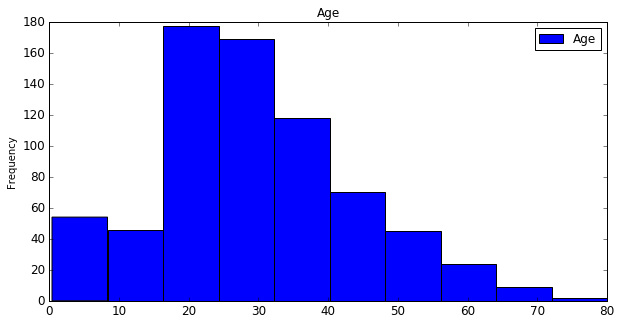

In [9]:
age_plot=train_df['Age'].plot(kind='hist',title='Age',figsize=(10,5),legend=True,fontsize=12)